In [1]:
# load libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kaleido
from IPython.display import Image

In [2]:
import warnings
warnings.filterwarnings("ignore")

For data integration, and cleaning please [check this notebook](https://github.com/machaniG/machaniG.github.io/blob/master/notebooks/Augmenting%20Crimsonloop%20data.ipynb)

In [3]:
df = pd.read_csv("marketing_extended.csv")
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date_x,Product_SKU,Product_Description,Product_Category,Quantity,...,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Transaction_Date_y,purchases,clicks_online,impressions_online
0,14031,F,Chicago,17,19075,1/29/2019,GGOEGBPB081999,UpCycled Bike Saddle Bag,Accessories,1,...,1/29/2019,700,836.13,1,ACC10,10,1/29/2019,99,4900,76323
1,15525,M,New York,48,17456,1/9/2019,GGOEAAAH083314,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/9/2019,5000,3287.83,1,AND10,10,1/9/2019,188,9306,144953
2,12947,M,California,48,17891,1/14/2019,GGOEAAAH083315,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/14/2019,5000,1920.57,1,AND10,10,1/14/2019,57,2821,43940
3,15923,F,Chicago,34,18470,1/21/2019,GGOEAAAH083315,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/21/2019,3000,640.93,1,AND10,10,1/21/2019,56,2772,43177
4,17581,M,California,25,18852,1/25/2019,GGOEAAAH083314,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/25/2019,1000,1124.95,1,AND10,10,1/25/2019,157,7772,121059


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52524 entries, 0 to 52523
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52524 non-null  int64  
 1   Gender               52524 non-null  object 
 2   Location             52524 non-null  object 
 3   Tenure_Months        52524 non-null  int64  
 4   Transaction_ID       52524 non-null  int64  
 5   Transaction_Date_x   52524 non-null  object 
 6   Product_SKU          52524 non-null  object 
 7   Product_Description  52524 non-null  object 
 8   Product_Category     52524 non-null  object 
 9   Quantity             52524 non-null  int64  
 10  Avg_UnitPrice        52524 non-null  float64
 11  Delivery_Charges     52524 non-null  float64
 12  Coupon_Status        52524 non-null  object 
 13  GST                  52524 non-null  float64
 14  Date                 52524 non-null  object 
 15  Offline_Spend        52524 non-null 

In [5]:
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date_x,Product_SKU,Product_Description,Product_Category,Quantity,...,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Transaction_Date_y,purchases,clicks_online,impressions_online
0,14031,F,Chicago,17,19075,1/29/2019,GGOEGBPB081999,UpCycled Bike Saddle Bag,Accessories,1,...,1/29/2019,700,836.13,1,ACC10,10,1/29/2019,99,4900,76323
1,15525,M,New York,48,17456,1/9/2019,GGOEAAAH083314,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/9/2019,5000,3287.83,1,AND10,10,1/9/2019,188,9306,144953
2,12947,M,California,48,17891,1/14/2019,GGOEAAAH083315,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/14/2019,5000,1920.57,1,AND10,10,1/14/2019,57,2821,43940
3,15923,F,Chicago,34,18470,1/21/2019,GGOEAAAH083315,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/21/2019,3000,640.93,1,AND10,10,1/21/2019,56,2772,43177
4,17581,M,California,25,18852,1/25/2019,GGOEAAAH083314,Android Men's Paradise Short Sleeve Tee Olive,Android,1,...,1/25/2019,1000,1124.95,1,AND10,10,1/25/2019,157,7772,121059


In [7]:
# function for barplots
def bar_graphs(df, x, y, hue, palette):
    """plots without hue"""
    ax = sns.barplot(data = df, x = x, y = y, hue = hue, palette = palette, errorbar=None)
    #remove all grids
    for location in ['right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
    plt.tight_layout()
    return ax

def bar_graphs2(df, x, y):
    """plots with hue"""
    ax = sns.barplot(data = df, x = x, y = y, errorbar=None)
    #remove all grids
    ax.grid(False)
    ax.tick_params(bottom = False)
    for location in ['right', 'top']:
        ax.spines[location].set_visible(False)
    plt.xlabel("")
    plt.tight_layout()
    return ax

def horizontal_bars(df, x, y, palette):
    ax = sns.barplot(data = df, x = x, y = y, orient = 'h', errorbar = None, palette = palette)
    #remove all grids
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
    #move the tick labels to the top of the graph using the Axes.xaxis.tick_top() method 
    # remove the top ticks instead of the bottom ones
    # color the x-tick labels, we use the same Axes.tick_params()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(top=False, left=False) #remove ticks
    plt.tight_layout()
    return ax

## Sales Distribution 

In [8]:
# calculate total net sales excluding tax and delivery charges for each transaction by multiplying unit price by quantity purchased
#convert discount to decimal
df["Discount_pct"] = df["Discount_pct"] / 100

df["net_sales"] = df["Avg_UnitPrice"] * df["Quantity"] * (1 - df['Discount_pct'])
df["net_sales"].describe()

count    52524.000000
mean        70.780353
std        136.477625
min          0.287000
25%          9.513000
50%         24.500000
75%        104.300000
max       8545.500000
Name: net_sales, dtype: float64

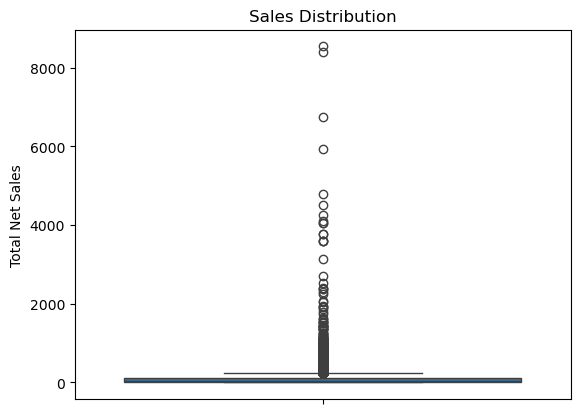

In [9]:
#sales distribution
sns.boxplot(data = df, y = "net_sales")
plt.ylabel("Total Net Sales")
plt.title("Sales Distribution")
plt.savefig("sales_distribution.png")
plt.show()

The sales data is highly skewed. Half of the transactions are below 24.50 dollars and 75% of them are below 104 dollars.

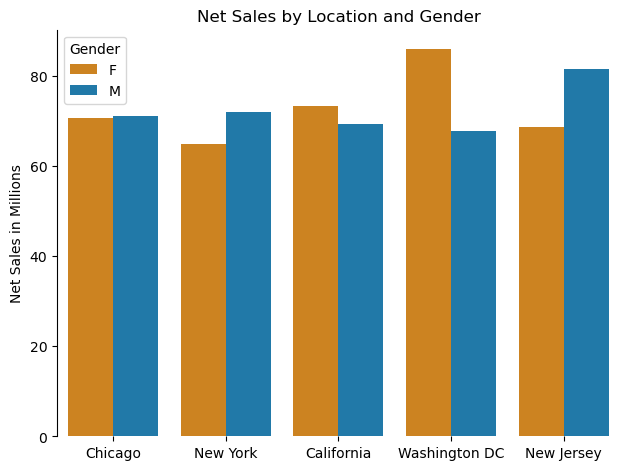

In [10]:
# Sales Distribution by Location and Gender
colors = ["#e88705", "#0a80bf"]

bar_graphs(df, x="Location", y="net_sales", hue="Gender", palette = colors)
plt.title("Net Sales by Location and Gender")
plt.xlabel("")
plt.ylabel("Net Sales in Millions")
plt.show()

## Summary Statistics by Category

In [11]:
q_bycategory = df.groupby("Product_Category").agg(
    Quantity_Sold = ("Quantity", "sum"),
    Total_Net_Sales = ("net_sales", "sum"),
    Average_Net_Sales = ("net_sales", "mean"),
    Customer_Count = ("CustomerID", "count"),
    Number_of_Transactions = ("Transaction_ID", "count")
).sort_values("Quantity_Sold", ascending=False).reset_index()

q_bycategory

,Product_Category,Quantity_Sold,Total_Net_Sales,Average_Net_Sales,Customer_Count,Number_of_Transactions
0,Office,88383,223229.256,34.274414,6513,6513
1,Apparel,32438,473377.963,26.115964,18126,18126
2,Drinkware,30501,161135.231,46.263345,3483,3483
3,Lifestyle,24881,60443.052,19.548206,3092,3092
4,Nest-USA,21430,2046977.708,146.077050,14013,14013
5,Bags,15273,121362.723,64.486038,1882,1882
6,Notebooks & Journals,9556,89103.790,118.963672,749,749
7,Headgear,3533,43800.622,56.810145,771,771
8,Nest,2837,403708.746,183.670949,2198,2198
9,Housewares,2484,3853.414,31.585361,122,122


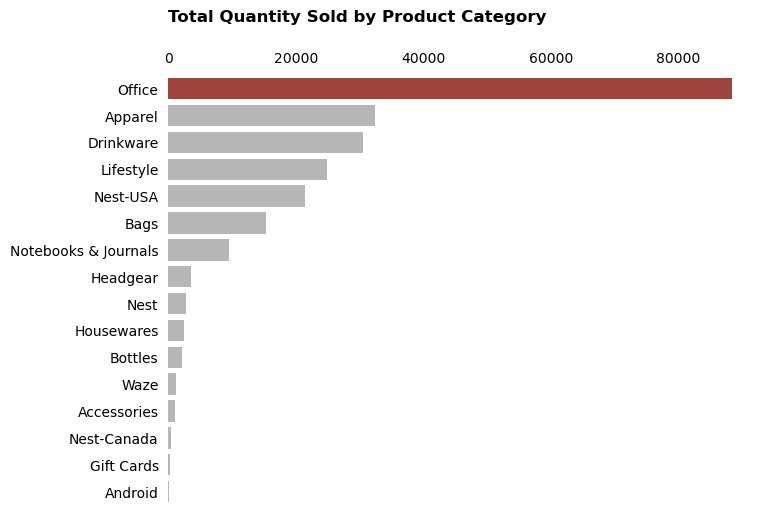

In [12]:
#visualize the top selling products in terms of quantities
palette = ["#ad372c" if (x > 40000)  else "#b6b6b6" for x in q_bycategory["Quantity_Sold"]] 
plt.figure(figsize = (8, 5))
ax = horizontal_bars(q_bycategory, x = "Quantity_Sold", y = "Product_Category", palette = palette)
 
ax.text(x=-0.1, y=-2.5, s="Total Quantity Sold by Product Category", fontsize = 12, weight = "bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

## Which Customers are High-value?

In [13]:
#get the sales Percentiles
df["net_sales"].quantile([0.5, 0.75, 0.95, 0.99])

0.50     24.5
0.75    104.3
0.95    249.9
0.99    428.4
Name: net_sales, dtype: float64

### Business Insights

Most transactions are relatively small: The median is just 24.5.

There is a long tail: The gap between the median (24.5) and the 99th percentile (428.4) shows that while most transactions are modest, a small number are much larger.

### Top 5% Customers by Spend

In [14]:
#total customers
df["CustomerID"].nunique()

1468

In [15]:
# top 5 percent transactions
cutoff = df["net_sales"].quantile(0.95)

high_value = df[df["net_sales"] > cutoff]

high_value["CustomerID"].nunique()

807

In [16]:
high_value["net_sales"].describe()

count    2585.000000
mean      411.631503
std       431.610788
min       250.560000
25%       279.200000
50%       316.000000
75%       402.300000
max      8545.500000
Name: net_sales, dtype: float64

### Top 1% spenders 

In [17]:
#top 1 percent transactions
one_percent = df["net_sales"].quantile([0.99]).iloc[0]
top_1_percent = df[df["net_sales"] > one_percent]
top_1_percent["CustomerID"].nunique()

299

In [18]:
# top 1 percent customers
top_1_percent[["net_sales", "Quantity"]].describe()

,net_sales,Quantity
count,514.000000,514.000000
mean,825.064451,82.550584
std,846.382776,142.733378
min,430.650000,2.000000
25%,488.775000,5.000000
50%,558.400000,15.000000
75%,786.707250,100.000000
max,8545.500000,900.000000


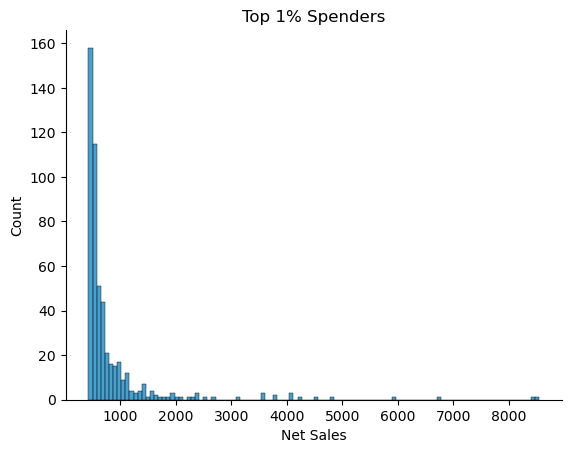

In [19]:
ax = sns.histplot(data = top_1_percent, x = "net_sales", color = "#0a80bf")
for location in ['right', 'top']:
        ax.spines[location].set_visible(False)
plt.title("Top 1% Spenders")
plt.xlabel("Net Sales")
plt.savefig("top1_percent.png")
plt.show()

**High-value customers:** 
- Out of 1,468 customers, 807 are VIP or bulk buyers and 299 customers out of the 807 VIPs are very high-value customers. 
- The top 5% and especially the top 1% of transactions are significantly higher, which may indicate VIP or bulk buyers.
- There is still a huge difference between the 99 percentile and the maximum transaction value. The data shows that 99% of transactions are below $428.4 while the maximum transaction value is $8,545.50. This confirms that we have outliers, and as we saw earlier, the sales are right skewed.
- Next I am going to investigate this outliers as these are rare and extremely valuable transactions.

## Ultra high-value customers by spend

Because most transations are below $500, I will set the extremenly rare, high-value transactions to be those above $1k

In [20]:
# above 1k
above_1k = df[df["net_sales"] > 1000]
above_1k[["net_sales", "Quantity"]].describe()

,net_sales,Quantity
count,80.000000,80.000000
mean,2124.159625,221.887500
std,1588.133016,195.177556
min,1004.400000,4.000000
25%,1116.000000,74.250000
50%,1424.304000,147.000000
75%,2365.200000,336.250000
max,8545.500000,791.000000


In [21]:
above_1k["CustomerID"].nunique()

41

There are 80 transactions above $1k and these were all bulk purchases, at least 4 units. Although some bought cheap products, some of them bought expensive products. A total of 41 customers account for these transactions.

## Customer Segmentation

### Rule-Based Segmentation

**Business Impact**

- **High-value customer focus:**

The 41 customers with transactions above $1,000 represent a small but extremely valuable segment. Targeting them with personalized offers, loyalty programs, or exclusive services can drive significant revenue growth.

- **Top percentile leverage:**
  
The 807 (95th percentile) and 299 (99th percentile) customers are critical for sustaining and growing the business. Understanding their preferences, purchase patterns, and demographics (e.g., location, gender) can help to tailor marketing and retention strategies.

**Customer Segmentation Rules**

- VIP/Elite tier: The 41 ultra high-value customers
- Premium tier: The 258 in the 99th percentile
- Loyalty tier: The 508 in the 95th percentile
- Regular: The rest of the customers, 661

In [22]:
#assign variables to the top 3 segments
vip = df[df["net_sales"] > 1000]
premium =  df[(df["net_sales"] > one_percent) & (~df["CustomerID"].isin(vip["CustomerID"]))]
loyalty = df[(df["net_sales"] > cutoff) & (~df["CustomerID"].isin(premium["CustomerID"])) & (~df["CustomerID"].isin(vip["CustomerID"]))]

print(vip["CustomerID"].nunique())
print(premium["CustomerID"].nunique())
print(loyalty["CustomerID"].nunique())

print("Vip transactions:", vip["CustomerID"].count())
print("Premium transactions:", premium["CustomerID"].count())
print("Loyalty transactions:", loyalty["CustomerID"].count())

41
258
508
Vip transactions: 80
Premium transactions: 370
Loyalty transactions: 1083


In [23]:
#Regular: The rest of the customers
regular = df[(df["net_sales"] <= cutoff) & (~df["CustomerID"].isin(premium["CustomerID"])) \
& (~df["CustomerID"].isin(vip["CustomerID"])) & (~df["CustomerID"].isin(loyalty["CustomerID"]))]


print("Regular transactions:", regular["CustomerID"].count())
print("Regular customers:", regular["CustomerID"].nunique())
print("Total customers:", df["CustomerID"].nunique())

Regular transactions: 9993
Regular customers: 661
Total customers: 1468


**Assign Segments in the Dataframe**

In [24]:
# Initialize segment column with NaNs
df["segment"] = np.nan
df["segment"] = pd.Series(dtype="object")

# Assign segments in order of exclusivity
df.loc[df["CustomerID"].isin(vip["CustomerID"]), "segment"] = "Elite Tier"

df.loc[
    (df["CustomerID"].isin(premium["CustomerID"])) & (df["segment"].isna()),
    "segment"] = "Premium Tier"

df.loc[
    (df["CustomerID"].isin(loyalty["CustomerID"])) & (df["segment"].isna()),
    "segment"] = "Loyalty Tier"

df.loc[
    (df["CustomerID"].isin(regular["CustomerID"])) & (df["segment"].isna()),
    "segment"] = "Regular Tier"


### Machine Learning-Driven Segmentation (K-Means Clustering)

To validate and potentially discover deeper, data-driven segments, I also applied K-means clustering using key RFM (Recency, Frequency, Monetary) features. This unsupervised learning approach provided an alternative perspective on natural customer groupings.

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import datetime

#### Calculate RFM features from the transaction data

In [26]:
# Convert Transaction_Date_x to datetime format
df['Transaction_Date_x'] = pd.to_datetime(df['Transaction_Date_x'])

# Assuming 'net_sales' for Monetary, 'Transaction_ID' for Frequency, and 'Transaction_Date_x' for Recency
# Use the most recent transaction date as reference
current_date = df['Transaction_Date_x'].max() 

rfm_data = df.groupby('CustomerID').agg(
    Recency = ('Transaction_Date_x', lambda date: (current_date - date.max()).days),
    Frequency = ('Transaction_ID', 'count'),
    Monetary = ('net_sales', 'sum')
).reset_index()


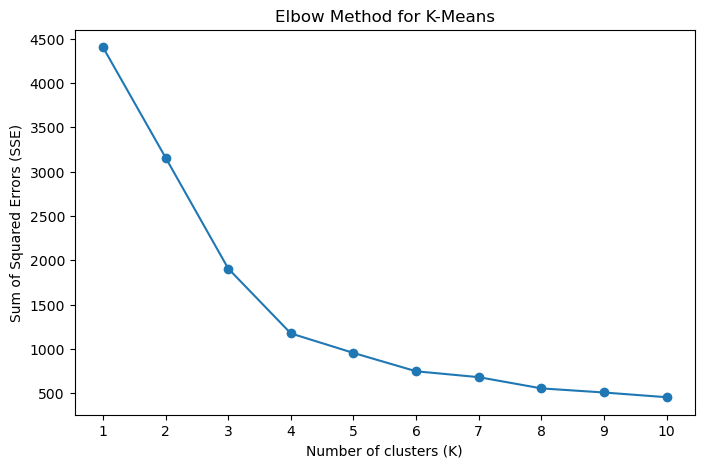

In [27]:
# Scale features for K-Means to ensure equal weighting
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Elbow method to search for optimal clusters
sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)   # WCSS

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for K-Means')
plt.xticks(K_range)
plt.grid(False)
plt.savefig("elbow_method.png")
plt.show()

In [28]:
# Apply K-Means clustering (e.g., for an optimal number of clusters, determined via elbow method/silhouette score)
# although the elbow joint is 3, I am gonna use optimal K=4 clusters to align with the rule-based segments

kmeans = KMeans(n_clusters = 4, random_state=42, n_init = 10) 
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# reduce dimensionality
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

rfm_data['pca1'] = rfm_pca[:, 0]
rfm_data['pca2'] = rfm_pca[:, 1]

In [29]:
#Get Unique Segment per Customer
customer_segments = df[['CustomerID', 'segment']].drop_duplicates(subset='CustomerID')

# Merge Segment information to rfm data
rfm_data = rfm_data.merge(customer_segments, on='CustomerID', how='left')

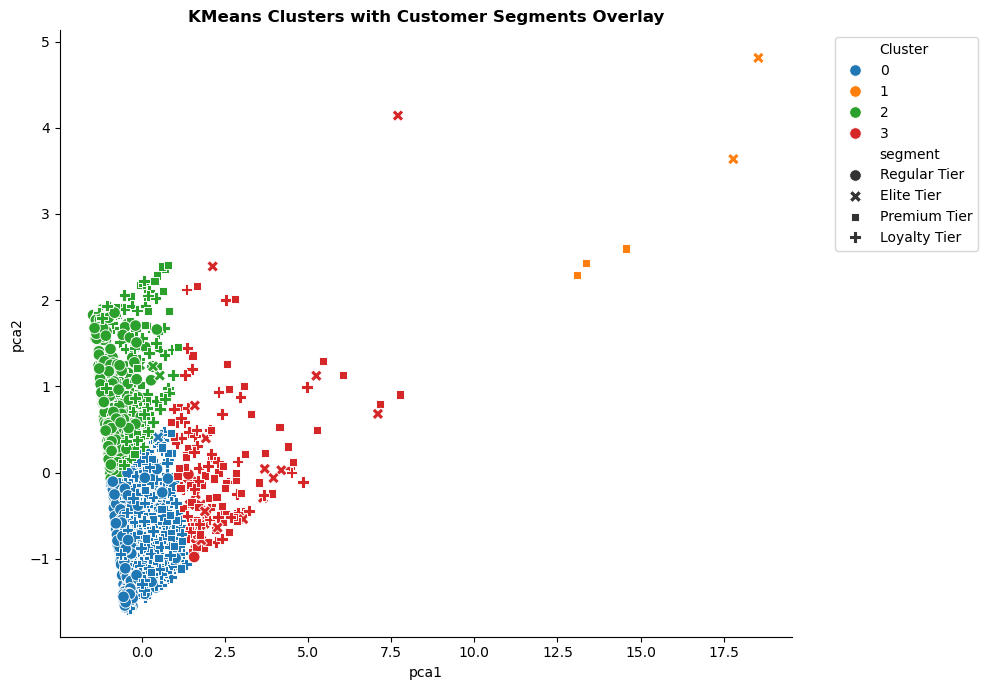

In [30]:
#visualize clusters and overlay rule-based segments
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(data=rfm_data, x='pca1', y='pca2', 
    hue = 'Cluster',      # KMeans clusters
    style = 'segment',    # Restored segments after merge
    palette = 'tab10',
    s = 70)
for location in ["top", "right"]:
    ax.spines[location].set_visible(False)
ax.grid(False)    

plt.title('KMeans Clusters with Customer Segments Overlay', weight = "bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Kmeans_clusters.png")
plt.show()

- Cluster 3 shows a strong alignment with the Elite Tier, reinforcing its distinctiveness. 
- The Loyalty, Premium, and Regular Tiers were primarily distributed across Cluster 0 and Cluster 2, suggesting a natural grouping of mid-to-low value customers that could be explored for more granular targeting. 

#### Quantitative Overlap Check 

Let's check how much the clusters and segments overlap with a crosstab:

In [31]:
pd.crosstab(rfm_data['segment'], rfm_data['Cluster'])

Cluster,0,1,2,3
segment,,,,
Elite Tier,9,2,6,24
Loyalty Tier,296,0,157,55
Premium Tier,123,3,58,74
Regular Tier,328,0,331,2


## How do Sales Vary by Segment?

In [32]:
by_segment = df.groupby("segment").agg({
    "CustomerID": "nunique",
    "Transaction_ID": "count",
    "Quantity": "sum",
    "net_sales": "sum"
}).sort_values("net_sales", ascending = False).reset_index()

by_segment

,segment,CustomerID,Transaction_ID,Quantity,net_sales
0,Loyalty Tier,508,20991,75438,1416308.385
1,Premium Tier,258,17332,90120,1352027.974
2,Elite Tier,41,4208,37587,485205.163
3,Regular Tier,661,9993,33222,464125.725


In [33]:
#average transaction value per segment
df.groupby("segment")["net_sales"].mean()

segment
Elite Tier      115.305409
Loyalty Tier     67.472173
Premium Tier     78.007614
Regular Tier     46.445084
Name: net_sales, dtype: float64

Our Loyalty tier is the leading, with $1,416,308 in revenue negerated between Jan 2019 and Dec 2019. This segment also has the second largest number of customers (508).

While our Regular segment has the largest number of customers (661), this it generated the least amount of revenue, $464,125 in 2019.

For detailed comparative analysis between segments, please check my Power BI dashboards [here](https://machanig.github.io/2025/02/09/customer-behavior.html)

## Customer Life Value

In [34]:
# Calculate historical LTV by summing up all net sales for each customer.
ltv_df = df.groupby('CustomerID')['net_sales'].sum().reset_index()
ltv_df.rename(columns={'net_sales': 'LTV'}, inplace=True)

# Merge LTV back into the original DataFrame
df_with_ltv = df.merge(ltv_df, on='CustomerID')

# Display the LTV for each customer
print(ltv_df.head(10))

   CustomerID       LTV
0       12346    21.693
1       12347  9930.649
2       12348  1142.502
3       12350   952.049
4       12356  1009.729
5       12359   481.448
6       12370  5451.926
7       12373   330.106
8       12377  8220.704
9       12383  4198.417


In [35]:
df_with_ltv.groupby("segment")["LTV"].mean().sort_values(ascending = False)

segment
Elite Tier      28227.579823
Premium Tier    10796.316734
Loyalty Tier     4572.792290
Regular Tier     1347.563302
Name: LTV, dtype: float64

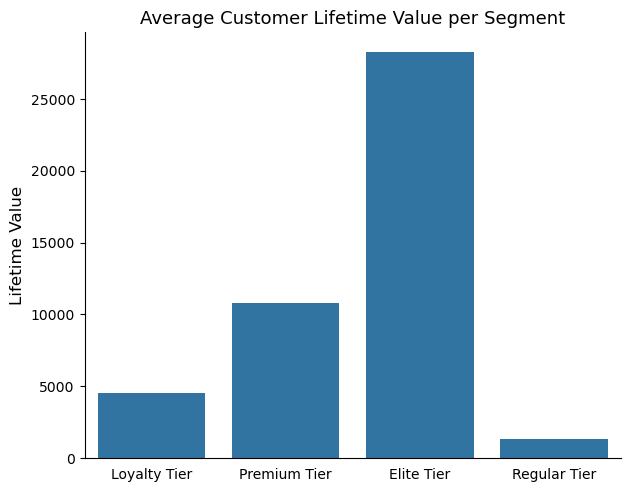

In [36]:
#visualize customer life value by segment by calling the plotting function defined above
ax = bar_graphs2(df_with_ltv, "segment", "LTV")
plt.title("Average Customer Lifetime Value per Segment", fontsize = 13)
plt.ylabel("Lifetime Value", fontsize = 12)
plt.show()

## Temporal Trends

In [37]:
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date_x"])

# Create a 'Month' column for grouping
df["Monthly"] = df["Transaction_Date"].dt.month_name()

# aggregate by month since we have multiple transactions per month
# Plotly will plot all points unless we don't aggregate, so for a clean trend line we aggregate first:

monthly_trend = df.groupby("Monthly")["net_sales"].sum().reset_index()

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert month column to categorical type
monthly_trend['Monthly'] = pd.Categorical(monthly_trend['Monthly'], categories=month_order, ordered=True)

# Sort by calendar order
monthly_trend = monthly_trend.sort_values('Monthly')

#print monthly sales
print(monthly_trend)

      Monthly   net_sales
4     January  360949.347
3    February  246658.920
7       March  241980.711
0       April  357159.753
8         May  243165.424
6        June  223357.225
5        July  332562.231
1      August  319556.824
11  September  251858.068
10    October  367271.883
9    November  406866.128
2    December  366280.733


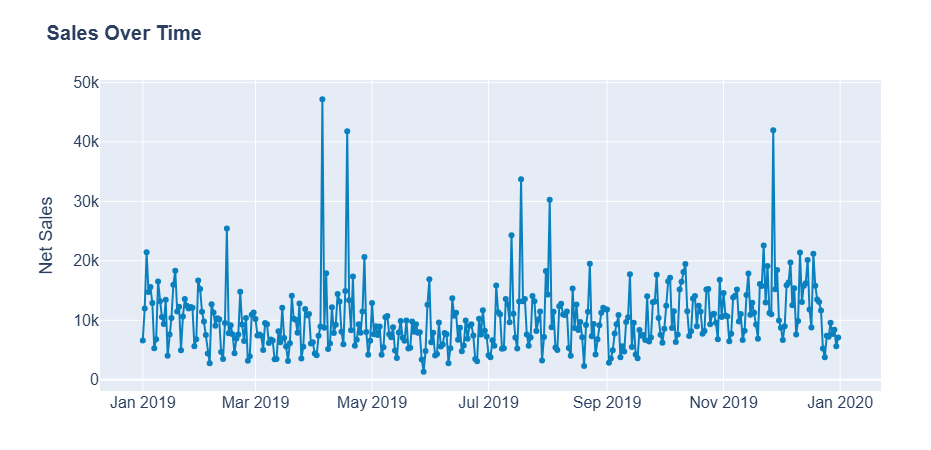

In [38]:
# sales over time
daily_sales = df.groupby(df["Transaction_Date"])["net_sales"].sum().reset_index()

#visualize
fig2 = px.line(daily_sales, x="Transaction_Date", y="net_sales", title="<b>Sales Over Time</b>",
              markers = True, color_discrete_sequence=["#0a80bf"])
fig2.update_layout(xaxis_title="", yaxis_title="Net Sales", width=900, height=450,  
                  font=dict(size=16, family="Arial"), title_font_size=20, 
                  xaxis_title_font_size=16, yaxis_title_font_size=18,
                  margin=dict(t=80, l=100, r=50, b=50))

# Save as PNG (or use .jpeg, .pdf, etc.)
fig2.write_image("all_sales_overtime.png", scale = 3)  
fig2.show()

- There is a spike of sales in 5th & 18th April, 18th July, and 27th November with 5th April leading in revenue generated.
- We generated more revenue in November (\\$406,866) followed by October (\\$367,271) and December (\\$366,280). 
- June was the lowest month with only \\$223,357 in sales.
- Although there are spikes of sales in April and July, the sum of sales is only \\$357,159 for April and \\$332,562 for July.

In [39]:
#extract day of the week from date 
df["DayOfWeek"] = df["Transaction_Date_x"].dt.day_name()

#count the number of transactions per day
day_counts = df["DayOfWeek"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index()
day_counts.columns = ["DayOfWeek", "TransactionCount"]


#total transaction amount per day
day_sales = df.groupby("DayOfWeek")["net_sales"].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index()

#visualize transactions by day of the week
fig = px.line(
    day_counts,
    x="DayOfWeek",
    y="TransactionCount",
    markers=True,
    title="<b>Transactions by Day of the Week</b>",
    width=700, height=450,
    color_discrete_sequence=["#0a80bf"]
)
fig.update_layout(xaxis_title="", yaxis_title="Number of Transactions", 
                  font=dict(size=16, family="Arial"), title_font_size=20, 
                  xaxis_title_font_size=16, yaxis_title_font_size=16,
                  margin=dict(t=80, l=100, r=50, b=50))

fig.update_xaxes(tickangle= -45)

# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("all_trans_dayofweek.png", scale = 3)  
fig.show()

![High value transactions over time](../img/all_trans_dayofweek.png)

In [40]:
#visualize revenue by day of the week
fig = px.line(
    day_sales,
    x="DayOfWeek",
    y="net_sales",
    markers=True,
    title="<b>Net Sales by Day of the Week<b>",
    width=650, height=450, color_discrete_sequence=["#0a80bf"]
)
fig.update_layout(xaxis_title="", yaxis_title="Net Sales", 
                  font=dict(size=16, family="Arial"), title_font_size=20, 
                  xaxis_title_font_size=16, yaxis_title_font_size=16,
                  margin=dict(t=80, l=100, r=50, b=50))

fig.update_xaxes(tickangle= -45)
fig.show()

![High value transactions over time](../img/all_sales_dayofweek)

- Transactions cluster on Wednesdays through Sunday with a peak on Fridays. We expect little traffic on Mondays and Tuesdays. 
- These clear seasonalities in sales can be used by both the marketing and supply chain departments to optimize timing for marketing and restocking. 

## Investigate High-Value Transactions: The Elite Tier

We established earlier that the 41 customers with transactions above $1,000 represent a small but extremely valuable segment. Targeting them with personalized offers, loyalty programs, or exclusive services can drive significant revenue growth.

In order to target them, we need to understand their product preferences, gender distribution, where are they located, and when they make purchases. 

#### Summary Statistice of Elite Customers 

In [41]:
vip = df[df["segment"] == "Elite Tier"]

In [42]:
vip_summary = vip.groupby("CustomerID").agg(
    Total_Sales = ("net_sales", "sum"),
    Number_of_Transactions = ("Transaction_ID", "count"),
    Quantity_Sold = ("Quantity", "sum"),
    Delivery_Charges = ("Delivery_Charges", "sum"),
    Location = ("Location", "first"),
    Gender = ("Gender", "first")
).reset_index()

top_10 = vip_summary.sort_values("Total_Sales", ascending = False)
print("The Top 10 Customers by Net Sales:")
print("\n")
top_10.head(10)

The Top 10 Customers by Net Sales:




,CustomerID,Total_Sales,Number_of_Transactions,Quantity_Sold,Delivery_Charges,Location,Gender
25,15311,62804.567,583,4106,4812.96,Chicago,F
6,12748,60803.807,682,4781,7999.84,Chicago,F
36,17850,30964.878,293,1125,3129.34,Chicago,M
34,17337,24902.122,260,1448,2588.03,California,F
22,14667,22980.528,165,1570,1302.60,California,F
24,15194,18097.334,114,2020,1092.84,Chicago,M
18,14180,18088.061,88,1669,1627.71,California,F
26,15351,16686.744,53,2160,558.37,Washington DC,F
9,13113,16674.327,60,2344,552.98,New Jersey,M
27,15601,13559.327,154,1649,2182.97,Chicago,F


In [43]:
# Sort and visualize the top 3 customers
vip_summary2 = vip_summary.reset_index()
top3 = vip_summary2.nlargest(3, "Total_Sales")

# Assign color
vip_summary2["bar_color"] = vip_summary2.apply(
    lambda row: "#ad372c" if row["CustomerID"] in top3["CustomerID"].values else "#b6b6b6",
    axis=1
)


fig = px.bar(
    vip_summary2,
    x="Location",         
    y="Total_Sales",
    color="bar_color",     # use bar_color for styling
    #hover_data=["CustomerID", "Quantity"],
    title="<b>Top 3 Elite Net Sales Highlighted<b>",
    color_discrete_map="identity",  # Use hex codes as-is
    width=700,
    height=600
)

fig.update_layout(yaxis_title="", xaxis_title="", font=dict(size=16, family="Arial"),
                  title_font_size=20, xaxis_title_font_size=16, yaxis_title_font_size=16,
                  margin=dict(t=80, l=80, r=50, b=50))

# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("top3_vipsales.png", scale = 3)

fig.show()

![Top 3 customers by sales](../img/top3_vipsales.png)

- Our leading customer (ID 15311) has purchased products worth almost \\$63K in 583 transactions. This customer has bought over 4.1k units.
- The top 3 customers are from Chicago, 2 female and 1 male, with a clear distinction between the first two (over \\$60k in revenue) and the third one who has made purchases worth approximately \\$31k.

### Elite Sales Distribution by Location

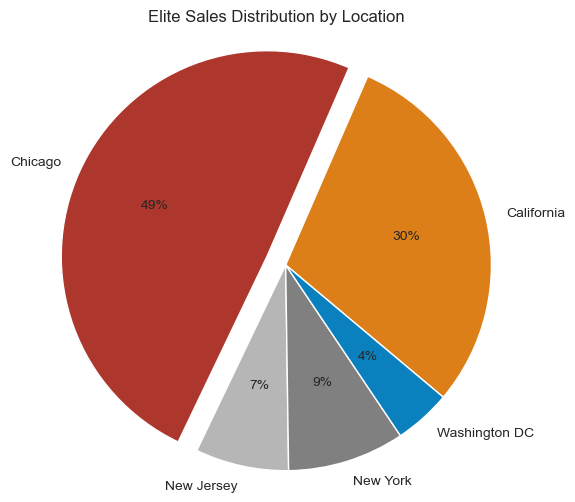

In [44]:
# sales distribution by location
data = vip.groupby("Location")["net_sales"].sum()
labels = data.index
sizes = data.values

# declaring exploding pie & colors
explode = [0, 0.1, 0, 0, 0]
palette_color = ["#dc7f18", "#ad372c", "#b6b6b6", "gray", "#0a80bf"]

sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels,  colors=palette_color, explode=explode, autopct='%.0f%%', startangle= 320)
plt.title("Elite Sales Distribution by Location")
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()

In [45]:
#location and gender

fig = px.bar(
    vip_summary, 
    x="Total_Sales", 
    y="Location", 
    color="Gender", 
    orientation='h',
    title="<b>Elite Sales Distribution by Location and Gender</b>",
    #hover_data=["CustomerID", "Quantity"],
    width=500,
    height=300,
    color_discrete_sequence=["#0a80bf", "#e88705"]
)

fig.update_layout(yaxis_title="", xaxis_title="", width=700, height=350, font=dict(size=16, family="Arial"),
                  title_font_size=17, xaxis_title_font_size=16, yaxis_title_font_size=16,
                  margin=dict(t=80, l=80, r=50, b=50))

# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("sales_loc_gender.png", scale = 3)  
fig.show()

![Elite sales distribution by location & gender](../img/sales_loc_gender.png)

#### Elite Customers by Location and Gender

In [46]:
# Group by both Location and Gender, then count unique customers
gender_summary = vip.groupby(["Location", "Gender"])["CustomerID"].nunique().reset_index()

# Rename the column for clarity
gender_summary.rename(columns={"CustomerID": "Unique_Customers"}, inplace=True)

In [47]:
fig = px.bar(
    gender_summary, 
    x="Unique_Customers", 
    y="Location", 
    color="Gender", 
    orientation='h',
    title = "<b>Elite Customers</b>",
    width=600,
    height=400,
    color_discrete_sequence=["#e88705", "#0a80bf"]
)

fig.update_layout(yaxis_title="", xaxis_title="", font=dict(size=16, family="Arial"),
                  title_font_size=17, xaxis_title_font_size=16, yaxis_title_font_size=16,
                  margin=dict(t=80, l=100, r=50, b=50))

# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("customers.png", scale = 3)  
fig.show()


![Elite customers](../img/customers.png)

- Chicago and California are leading in elite sales with 44% and 33% of total sales, respectively.
- The number of elite customers in Chicago and California is more than twice that in other locations.
- There are more female customers than male customers in Chicago, California and Washington DC.

### Product Category Analysis for High-Value Transactions

**Business Impact:**

Discover which categories drive the most revenue from big spenders and inform inventory, promotions, and procurement.

In [48]:
#group elite segment by category and get summary stats on sales
category = vip.groupby("Product_Category")["net_sales"].agg(
    ["count", "sum", "mean"]).sort_values("sum", ascending=False)
category

,count,sum,mean
Product_Category,,,
Nest-USA,1110,166778.170,150.250604
Apparel,1405,92941.186,66.150310
Office,549,44965.685,81.904709
Notebooks & Journals,72,42606.818,591.761361
Nest,174,38572.751,221.682477
Drinkware,300,31965.713,106.552377
Headgear,74,26906.263,363.598149
Bags,180,24064.253,133.690294
Lifestyle,212,8699.596,41.035830


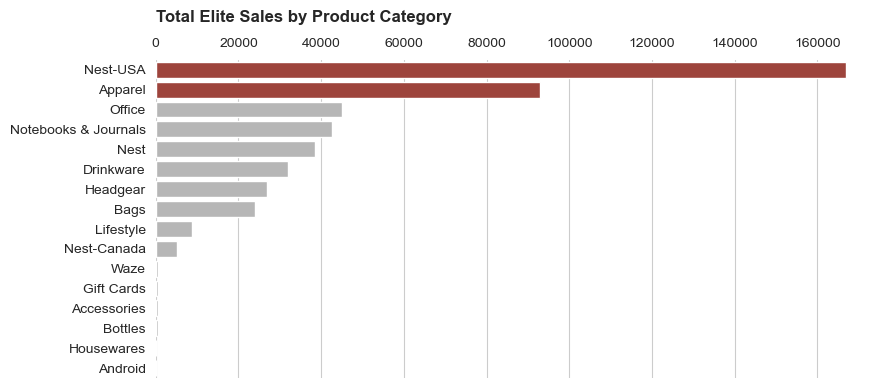

In [49]:
# call horizontal_bars we created above to plot sales by product category
colors = ['#ad372c' if (x > 50000)  else "#b6b6b6" for x in category["sum"]] 
plt.figure(figsize = (9, 4))
fig = horizontal_bars(category, x = "sum", y = "Product_Category", palette = colors)
fig.text(x=-30, y=-2.4, s="Total Elite Sales by Product Category", fontsize = 12, weight = "bold")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.savefig("vip sales_bycategory.png")
plt.show()

- Nest-USA and Apparel are the leading categories sold to elite customers

### Distribution of transactions by category

**Which products are mostly bought by elite customers?**

In [50]:
#group by category and sum quantity sold and number of transactions
products = vip.groupby("Product_Category").agg({
    "Transaction_ID": "count",
    "CustomerID": "count",
    "Quantity": "sum",
    "net_sales": "sum"
}).sort_values("net_sales", ascending = False)

products

,Transaction_ID,CustomerID,Quantity,net_sales
Product_Category,,,,
Nest-USA,1110,1110,1729,166778.170
Apparel,1405,1405,5681,92941.186
Office,549,549,11597,44965.685
Notebooks & Journals,72,72,4291,42606.818
Nest,174,174,255,38572.751
Drinkware,300,300,4483,31965.713
Headgear,74,74,2120,26906.263
Bags,180,180,3910,24064.253
Lifestyle,212,212,2833,8699.596


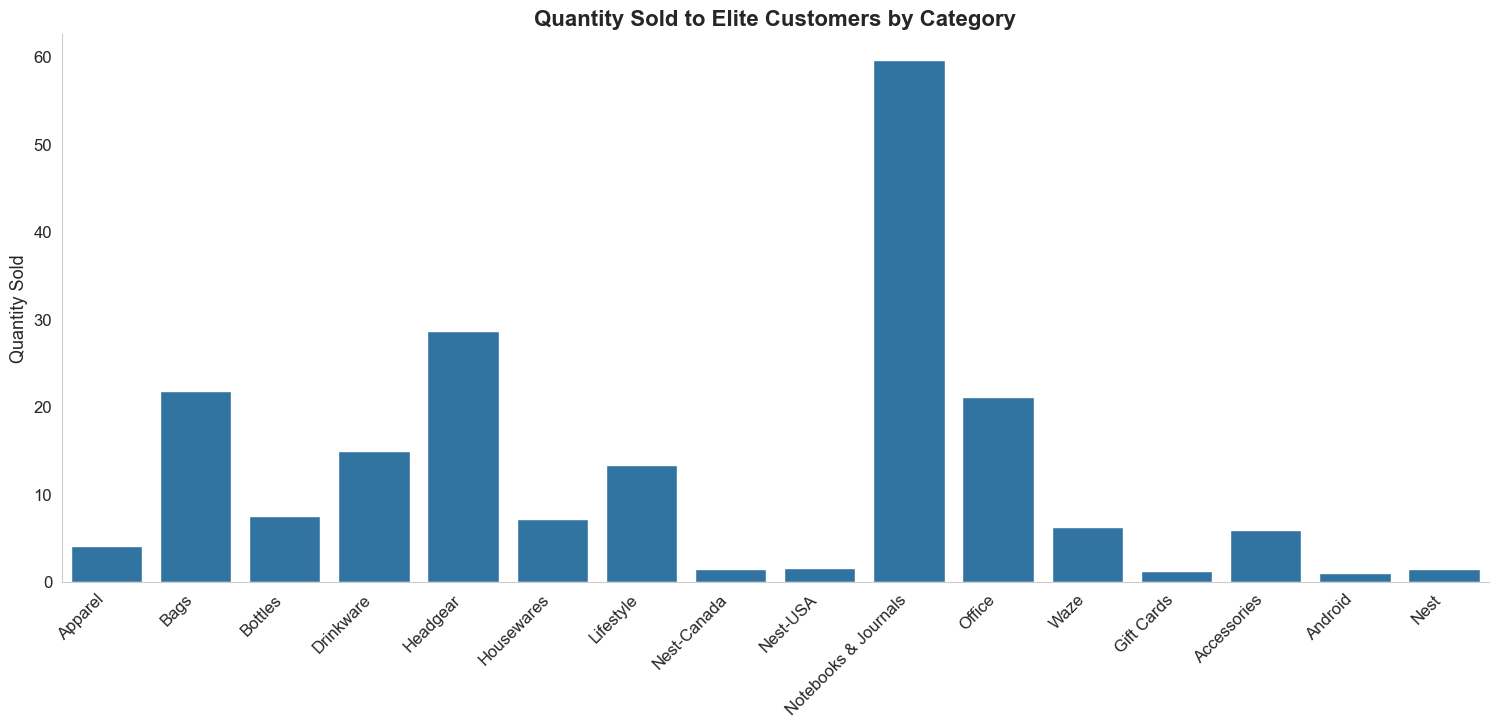

In [51]:
## visualize results with plotting function defined above
plt.figure(figsize = (15, 6))
bar_graphs2(vip, "Product_Category", "Quantity")
plt.title("Quantity Sold to Elite Customers by Category", fontsize = 16, weight = "bold")
plt.ylabel("Quantity Sold", fontsize = 13)
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## Temporal Trends of High-Value Transactions

### **Business Impact:**

Identify seasonality, campaign impact, or anomalies in high-value sales to optimize timing for marketing and restocking.

In [52]:
#change transaction date to datetime
vip["Transaction_Date"] = pd.to_datetime(vip["Transaction_Date_x"])

#group by month and calculate total monthly sales
monthly_trend = vip.groupby(vip["Transaction_Date"].dt.to_period("M"))["net_sales"].sum().reset_index()
monthly_trend["Month"] = monthly_trend["Transaction_Date"].dt.to_timestamp()
monthly_trend


,Transaction_Date,net_sales,Month
0,2019-01,43662.465,2019-01-01
1,2019-02,34777.240,2019-02-01
2,2019-03,25273.983,2019-03-01
3,2019-04,126895.806,2019-04-01
4,2019-05,12347.368,2019-05-01
5,2019-06,20631.646,2019-06-01
6,2019-07,51261.489,2019-07-01
7,2019-08,45375.120,2019-08-01
8,2019-09,15467.165,2019-09-01
9,2019-10,34480.872,2019-10-01


In [53]:
vip["Transaction_Date"] = pd.to_datetime(vip["Transaction_Date_x"])

# Create a 'Month' column for grouping
vip["Monthly"] = vip["Transaction_Date"].dt.month_name()

# aggregate by month since we have multiple transactions per month
# Plotly will plot all points unless we don't aggregate, so for a clean trend line we aggregate first:

monthly_trend = vip.groupby("Monthly")["net_sales"].sum().reset_index()

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert month column to categorical type
monthly_trend['Monthly'] = pd.Categorical(monthly_trend['Monthly'], categories=month_order, ordered=True)

# Sort by calendar order
monthly_trend = monthly_trend.sort_values('Monthly')


In [54]:
#visualize monthly sales
fig = px.line(
    monthly_trend,
    x="Monthly",
    y="net_sales",
    markers=True,
    title="<b>Monthly Elite Sales<b>",
    color_discrete_sequence=["#0a80bf"]
)

fig.update_layout(yaxis_title="Total Net Sales", width=800, height=450, xaxis_title="", 
                  font=dict(size=16, family="Arial"), title_font_size=20, 
                  xaxis_title_font_size=16, yaxis_title_font_size=16,
                  margin=dict(t=80, l=100, r=50, b=50))
fig.update_xaxes(tickangle= -45)

# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("monthly_sales.png", scale = 3)  

fig.show()

![High value monthly sales](../img/monthly_sales.png)

There was a spike of sales in April

#### Aggregate Transaction counts over time

In [55]:
# transactions per day
# Group by date for transaction count
daily_counts = vip.groupby(vip["Transaction_Date"].dt.date).size().reset_index(name="transaction_count")


#visualize
fig1 = px.line(daily_counts, x="Transaction_Date", y="transaction_count", markers=True, 
               title="<b>Elite Transactions Over Time</b>", width=800, height=450,
              color_discrete_sequence=["#0a80bf"])
fig1.update_layout(xaxis_title="", yaxis_title="Number of Transactions", 
                  font=dict(size=16, family="Arial"), title_font_size=20, 
                  xaxis_title_font_size=16, yaxis_title_font_size=16,
                  margin=dict(t=80, l=100, r=50, b=50))

# Save as PNG (or use .jpeg, .pdf, etc.)
fig1.write_image("transactions_overtime.png", scale = 3)  
fig1.show()

There is a spike of Elite transactions in December but we generated more revenue in April from this segment as shown above.

![High value transactions over time](../img/transactions_overtime.png)

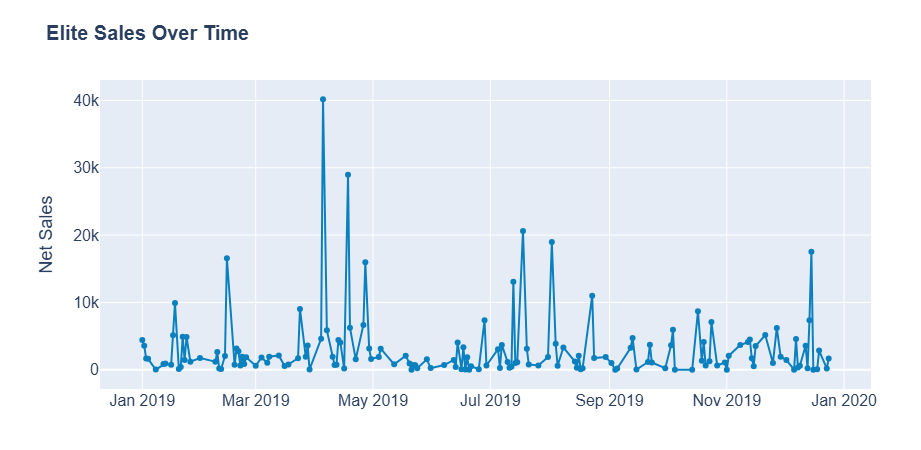

In [64]:
# Group by date for net sales sum
daily_sales = vip.groupby(vip["Transaction_Date"])["net_sales"].sum().reset_index()

#visualize
fig2 = px.line(daily_sales, x="Transaction_Date", y="net_sales", title="<b>Elite Sales Over Time</b>",
              markers = True, color_discrete_sequence=["#0a80bf"])
fig2.update_layout(xaxis_title="", yaxis_title="Net Sales", width=900, height=450,  
                  font=dict(size=16, family="Arial"), title_font_size=20, yaxis_title_font_size=18,
                  margin=dict(t=80, l=100, r=50, b=50))

# Save as PNG (or use .jpeg, .pdf, etc.)
fig2.write_image("sales_overtime.png", scale = 3)  
fig2.show()

![High value sales over time](../img/sales_overtime.png)

- High value sales spike in April with April 5th leading in revenue generated from elite customers.

#### Which Days of the Week do We Expect Elite Sales?

In [57]:
#extract day of the week from date 
vip["DayOfWeek"] = vip["Transaction_Date"].dt.day_name()

#count the number of transactions per day
day_counts = vip["DayOfWeek"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index()
day_counts.columns = ["DayOfWeek", "TransactionCount"]


#total transaction amount per day
day_sales = vip.groupby("DayOfWeek")["net_sales"].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index()


In [58]:
day_counts

,DayOfWeek,TransactionCount
0,Monday,310
1,Tuesday,232
2,Wednesday,435
3,Thursday,900
4,Friday,967
5,Saturday,770
6,Sunday,594


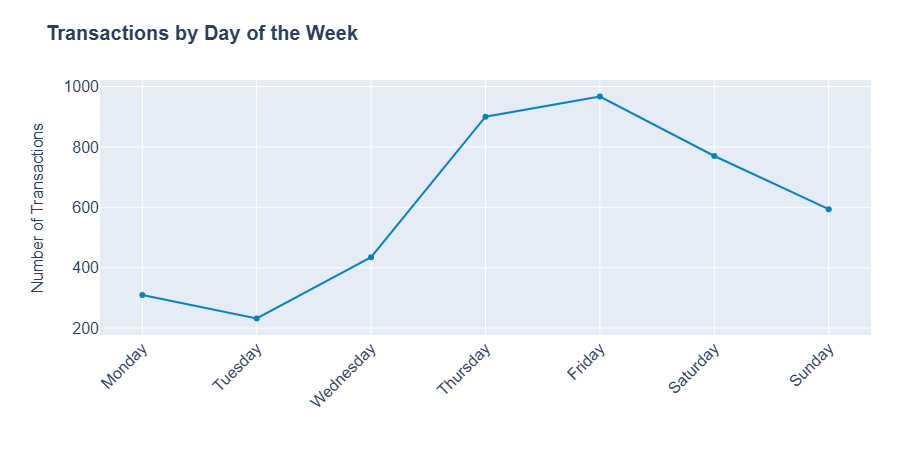

In [59]:
# visualize daily transactions
fig = px.line(
    day_counts,
    x="DayOfWeek",
    y="TransactionCount",
    markers=True,
    title="<b>Transactions by Day of the Week</b>",
    width=700, height=450,
    color_discrete_sequence=["#0a80bf"]
)
fig.update_layout(xaxis_title="", yaxis_title="Number of Transactions", 
                  font=dict(size=16, family="Arial"), title_font_size=20, 
                  xaxis_title_font_size=16, yaxis_title_font_size=16,
                  margin=dict(t=80, l=100, r=50, b=50))

fig.update_xaxes(tickangle= -45)

# Save as PNG (or use .jpeg, .pdf, etc.)
fig.write_image("trans_dayofweek.png", scale = 3)  
fig.show()

![High value transactions by day of the week](../img/trans_dayofweek.png)

- Elite transactions cluster around Thursdays and Fridays with very little activity on Mondays and Tuesdays.

In [60]:
#save the df to csv so that we can export it to power Bi for comparative analysis of segments
df.to_csv("marketing_df.csv", index = False)

*authored by frida*